In [1]:
import os
import re
import sys
import glob
import numpy  as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt

from invisible_cities.database  import load_db
from invisible_cities.io.dst_io import load_dst
from invisible_cities.io.dst_io import df_writer
%config InlineBackend.figure_format = 'svg'


In [2]:
# Load in the database information
# Configure the detector database
detector_db = "next100"
datapmt = load_db.DataPMT(detector_db, 0)
xpmt, ypmt = datapmt["X"].values, datapmt["Y"].values
sensorids  = datapmt["SensorID"].values
pmt = "PmtR11410"

S1 Table validation plots

In [3]:
# Load in the table
lt     = load_dst("../LT/NEXT100_MC_v07_10_01_Jan2026_S1_LT.h5", "LT", "LightTable")
err    = load_dst("../LT/NEXT100_MC_v07_10_01_Jan2026_S1_LT.h5", "LT", "Error")
config = load_dst("../LT/NEXT100_MC_v07_10_01_Jan2026_S1_LT.h5", "LT", "Config")

bv=20

# display(lt)
# print(sorted(lt.y.unique()))

# display(err)

lt_old     = load_dst(f"../LT/Old_LT_v3/NEXT100_MC_v07_10_00_Dec2025_S1_LT.h5", "LT", "LightTable")
config_old = load_dst(f"../LT/Old_LT_v3/NEXT100_MC_v07_10_00_Dec2025_S1_LT.h5", "LT", "Config")

In [4]:
display(lt)
print(max(lt.y))
print(min(lt.y))
print(sorted(lt.x.unique()))
print(sorted(lt.y.unique()))
print(sorted(lt.z.unique()))

display(lt_old)
print(max(lt_old.y))
print(min(lt_old.y))
print(sorted(lt_old.x.unique()))
print(sorted(lt_old.y.unique()))
print(sorted(lt_old.z.unique()))

x       y       z  PmtR11410_0  PmtR11410_1  PmtR11410_2  \
0     -490.00 -163.35     5.0     0.000090     0.000094     0.000099   
1     -490.00 -163.35    25.0     0.000131     0.000135     0.000135   
2     -490.00 -163.35    45.0     0.000142     0.000144     0.000141   
3     -490.00 -163.35    65.0     0.000152     0.000154     0.000155   
4     -490.00 -163.35    85.0     0.000161     0.000158     0.000156   
...       ...     ...     ...          ...          ...          ...   
12477  489.95  163.30  1105.0     0.000370     0.000342     0.000283   
12478  489.95  163.30  1125.0     0.000373     0.000350     0.000281   
12479  489.95  163.30  1145.0     0.000363     0.000340     0.000269   
12480  489.95  163.30  1165.0     0.000358     0.000332     0.000266   
12481  489.95  163.30  1185.0     0.000224     0.000225     0.000191   

       PmtR11410_3  PmtR11410_4  PmtR11410_5  PmtR11410_6  ...  PmtR11410_51  \
0         0.000090     0.000090     0.000090     0.000092  ...      0.000089   
1         0.000130     0.000134     0.000138     0.000134  ...      0.000124   
2         0.000145     0.000140     0.000146     0.000140  ...      0.000135   
3         0.000155     0.000158     0.000150     0.000151  ...      0.000143   
4         0.000154     0.000154     0.000160     0.000153  ...      0.000153   
...            ...          ...          ...          ...  ...           ...   
12477     0.000258     0.000265     0.000305     0.000435  ...      0.000216   
12478     0.000257     0.000250     0.000302     0.000443  ...      0.000204   
12479     0.000253     0.000259     0.000296     0.000454  ...      0.000205   
12480     0.000235     0.000237     0.000280     0.000402  ...      0.000197   
12481     0.000183     0.000176     0.000191     0.000249  ...      0.000169   

       PmtR11410_52  PmtR11410_53  PmtR11410_54  PmtR11410_55  PmtR11410_56  \
0          0.000088      0.000086      0.000086      0.000088      0.000092   
1          0.000125      0.000131      0.000126      0.000129      0.000125   
2          0.000144      0.000138      0.000136      0.000140      0.000136   
3          0.000150      0.000150      0.000148      0.000148      0.000143   
4          0.000152      0.000150      0.000150      0.000150      0.000153   
...             ...           ...           ...           ...           ...   
12477      0.000232      0.000323      0.000367      0.000244      0.000216   
12478      0.000226      0.000320      0.000344      0.000234      0.000210   
12479      0.000220      0.000318      0.000308      0.000236      0.000206   
12480      0.000206      0.000263      0.000210      0.000223      0.000193   
12481      0.000166      0.000199      0.000206      0.000160      0.000168   

       PmtR11410_57  PmtR11410_58  PmtR11410_59  PmtR11410_total  
0          0.000097      0.000095      0.000085         0.005259  
1          0.000129      0.000132      0.000128         0.007416  
2          0.000133      0.000146      0.000140         0.008007  
3          0.000142      0.000143      0.000151         0.008506  
4          0.000153      0.000155      0.000154         0.008743  
...             ...           ...           ...              ...  
12477      0.000218      0.000240      0.000365         0.016557  
12478      0.000212      0.000228      0.000362         0.016286  
12479      0.000201      0.000229      0.000328         0.015932  
12480      0.000200      0.000220      0.000213         0.014233  
12481      0.000165      0.000158      0.000192         0.010875  

[12482 rows x 64 columns]

489.9499999999999
-489.99999999999994
[-489.99999999999994, -424.66999999999996, -359.34, -294.01, -228.68, -163.35000000000002, -98.02000000000004, -32.690000000000055, 32.63999999999993, 97.96999999999986, 163.2999999999999, 228.62999999999994, 293.95999999999987, 359.2899999999998, 424.61999999999983, 489.9499999999999]
[-489.99999999999994, -424.66999999999996, -359.34, -294.01, -228.68, -163.35000000000002, -98.02000000000004, -32.690000000000055, 32.63999999999993, 97.96999999999986, 163.2999999999999, 228.62999999999994, 293.95999999999987, 359.2899999999998, 424.61999999999983, 489.9499999999999]
[5.0, 25.0, 45.0, 65.0, 85.0, 105.0, 125.0, 145.0, 165.0, 185.0, 205.0, 225.0, 245.0, 265.0, 285.0, 305.0, 325.0, 345.0, 365.0, 385.0, 405.0, 425.0, 445.0, 465.0, 485.0, 505.0, 525.0, 545.0, 565.0, 585.0, 605.0, 625.0, 645.0, 665.0, 685.0, 705.0, 725.0, 745.0, 765.0, 785.0, 805.0, 825.0, 845.0, 865.0, 885.0, 905.0, 925.0, 945.0, 965.0, 985.0, 1005.0, 1025.0, 1045.0, 1065.0, 1085.0, 110

x       y       z  PmtR11410_0  PmtR11410_1  PmtR11410_2  \
0     -490.00 -163.35     5.0     0.000092     0.000091     0.000092   
1     -490.00 -163.35    25.0     0.000137     0.000128     0.000132   
2     -490.00 -163.35    45.0     0.000147     0.000148     0.000145   
3     -490.00 -163.35    65.0     0.000156     0.000158     0.000153   
4     -490.00 -163.35    85.0     0.000160     0.000158     0.000158   
...       ...     ...     ...          ...          ...          ...   
12477  489.95  163.30  1125.0     0.000377     0.000353     0.000278   
12478  489.95  163.30  1145.0     0.000363     0.000338     0.000279   
12479  489.95  163.30  1165.0     0.000350     0.000326     0.000263   
12480  489.95  163.30  1185.0     0.000248     0.000255     0.000228   
12481  489.95  228.63     5.0     0.000033     0.000033     0.000039   

       PmtR11410_3  PmtR11410_4  PmtR11410_5  PmtR11410_6  ...  PmtR11410_51  \
0         0.000092     0.000088     0.000094     0.000089  ...      0.000087   
1         0.000136     0.000129     0.000129     0.000127  ...      0.000117   
2         0.000148     0.000151     0.000149     0.000145  ...      0.000146   
3         0.000159     0.000156     0.000154     0.000154  ...      0.000146   
4         0.000158     0.000159     0.000163     0.000156  ...      0.000149   
...            ...          ...          ...          ...  ...           ...   
12477     0.000260     0.000259     0.000306     0.000447  ...      0.000213   
12478     0.000247     0.000261     0.000298     0.000457  ...      0.000206   
12479     0.000237     0.000242     0.000275     0.000424  ...      0.000193   
12480     0.000204     0.000203     0.000237     0.000216  ...      0.000175   
12481     0.000034     0.000037     0.000041     0.000038  ...      0.000036   

       PmtR11410_52  PmtR11410_53  PmtR11410_54  PmtR11410_55  PmtR11410_56  \
0          0.000082      0.000080      0.000083      0.000076      0.000087   
1          0.000138      0.000122      0.000129      0.000122      0.000129   
2          0.000144      0.000141      0.000141      0.000138      0.000138   
3          0.000144      0.000146      0.000150      0.000146      0.000140   
4          0.000152      0.000154      0.000149      0.000149      0.000143   
...             ...           ...           ...           ...           ...   
12477      0.000227      0.000333      0.000339      0.000245      0.000215   
12478      0.000217      0.000329      0.000296      0.000238      0.000209   
12479      0.000210      0.000281      0.000222      0.000223      0.000197   
12480      0.000177      0.000173      0.000173      0.000178      0.000176   
12481      0.000031      0.000039      0.000033      0.000032      0.000032   

       PmtR11410_57  PmtR11410_58  PmtR11410_59  PmtR11410_total  
0          0.000090      0.000086      0.000086         0.004987  
1          0.000128      0.000130      0.000130         0.007311  
2          0.000146      0.000143      0.000143         0.008216  
3          0.000149      0.000149      0.000146         0.008529  
4          0.000152      0.000147      0.000149         0.008792  
...             ...           ...           ...              ...  
12477      0.000206      0.000232      0.000357         0.016389  
12478      0.000202      0.000233      0.000320         0.015985  
12479      0.000192      0.000222      0.000238         0.014465  
12480      0.000170      0.000200      0.000187         0.011236  
12481      0.000034      0.000039      0.000038         0.002008  

[12482 rows x 64 columns]

489.9499999999999
-489.99999999999994
[-489.99999999999994, -424.66999999999996, -359.34, -294.01, -228.68, -163.35000000000002, -98.02000000000004, -32.690000000000055, 32.63999999999993, 97.96999999999986, 163.2999999999999, 228.62999999999994, 293.95999999999987, 359.2899999999998, 424.61999999999983, 489.9499999999999]
[-489.99999999999994, -424.66999999999996, -359.34, -294.01, -228.68, -163.35000000000002, -98.02000000000004, -32.690000000000055, 32.63999999999993, 97.96999999999986, 163.2999999999999, 228.62999999999994, 293.95999999999987, 359.2899999999998, 424.61999999999983, 489.9499999999999]
[5.0, 25.0, 45.0, 65.0, 85.0, 105.0, 125.0, 145.0, 165.0, 185.0, 205.0, 225.0, 245.0, 265.0, 285.0, 305.0, 325.0, 345.0, 365.0, 385.0, 405.0, 425.0, 445.0, 465.0, 485.0, 505.0, 525.0, 545.0, 565.0, 585.0, 605.0, 625.0, 645.0, 665.0, 685.0, 705.0, 725.0, 745.0, 765.0, 785.0, 805.0, 825.0, 845.0, 865.0, 885.0, 905.0, 925.0, 945.0, 965.0, 985.0, 1005.0, 1025.0, 1045.0, 1065.0, 1085.0, 110

In [5]:
xmin=-500
xmax=500
xbw=20

zmin=-5
zmax=1190
zbw=20

# xbins = np.arange(xmin, xmax+xbw, xbw)
xbins = np.linspace(-490-65.33/2, 490+65.33/2, 17)
ybins = xbins
zbins = np.arange(zmin, zmax+zbw, zbw)

xbins_centre = np.arange(xmin+xbw/2, xmax+xbw/2, xbw)
ybins_centre = xbins_centre
zbins_centre = np.arange(zmin+zbw/2, zmax+zbw/2, zbw)

In [6]:
print(xbins)
print(np.arange(-490-65.33/2, 490+65.33/2, 65.33))

[-522.665    -457.331875 -391.99875  -326.665625 -261.3325   -195.999375
 -130.66625   -65.333125    0.         65.333125  130.66625   195.999375
  261.3325    326.665625  391.99875   457.331875  522.665   ]
[-5.22665e+02 -4.57335e+02 -3.92005e+02 -3.26675e+02 -2.61345e+02
 -1.96015e+02 -1.30685e+02 -6.53550e+01 -2.50000e-02  6.53050e+01
  1.30635e+02  1.95965e+02  2.61295e+02  3.26625e+02  3.91955e+02
  4.57285e+02  5.22615e+02]


[   5.   25.   45.   65.   85.  105.  125.  145.  165.  185.  205.  225.
  245.  265.  285.  305.  325.  345.  365.  385.  405.  425.  445.  465.
  485.  505.  525.  545.  565.  585.  605.  625.  645.  665.  685.  705.
  725.  745.  765.  785.  805.  825.  845.  865.  885.  905.  925.  945.
  965.  985. 1005. 1025. 1045. 1065. 1085. 1105. 1125. 1145. 1165. 1185.]


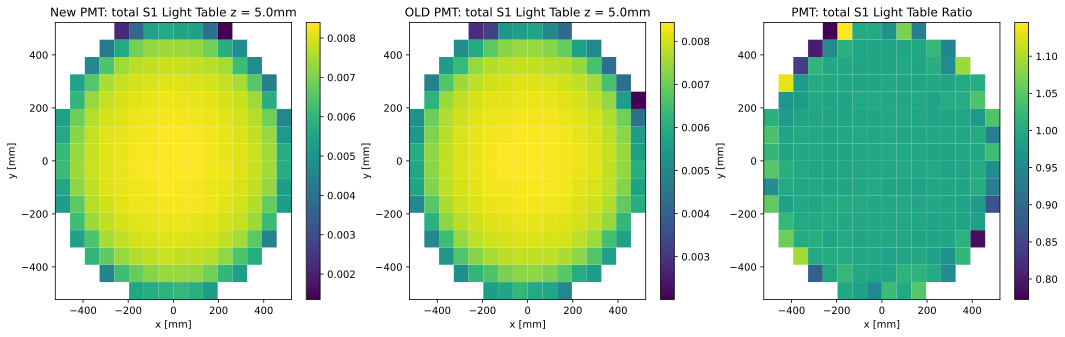

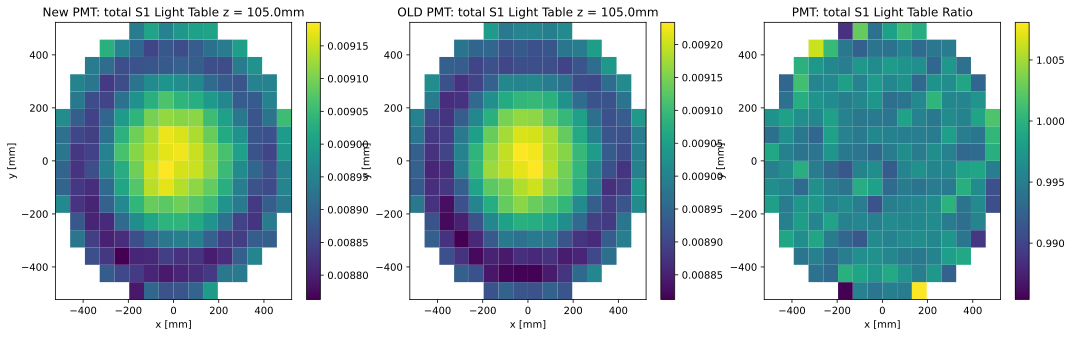

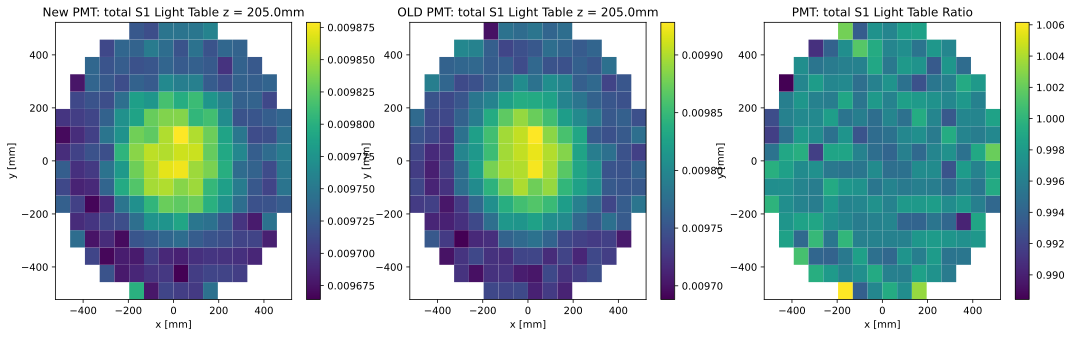

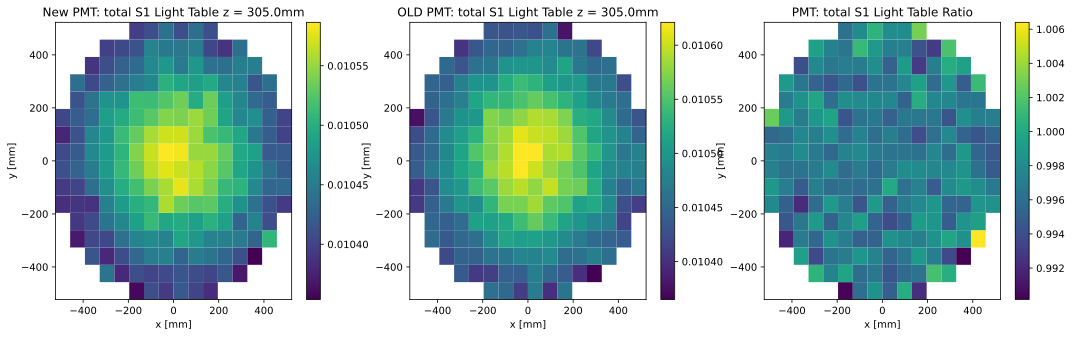

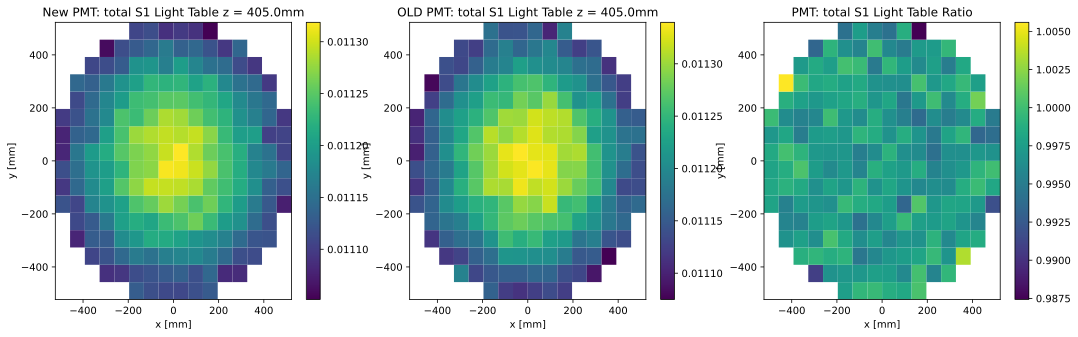

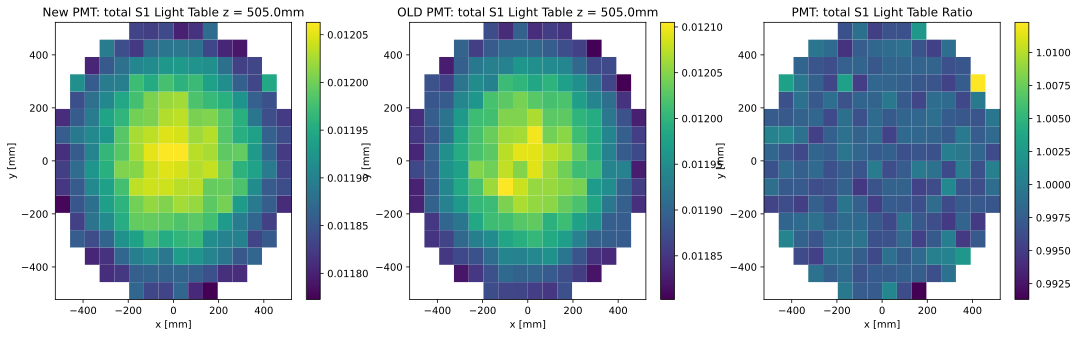

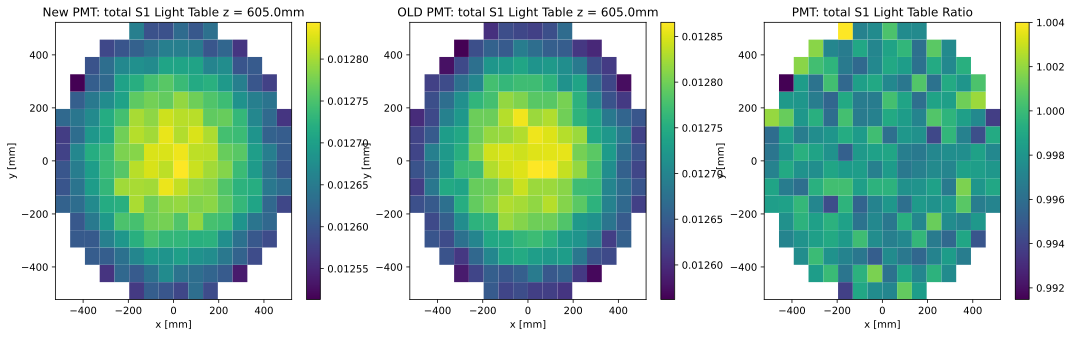

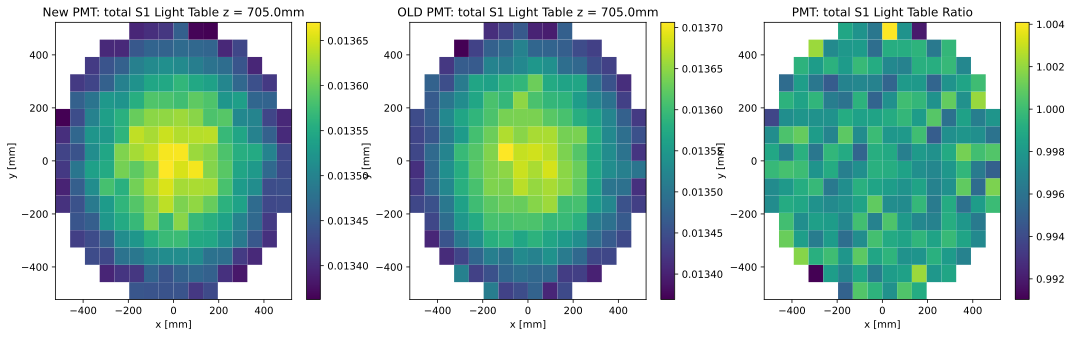

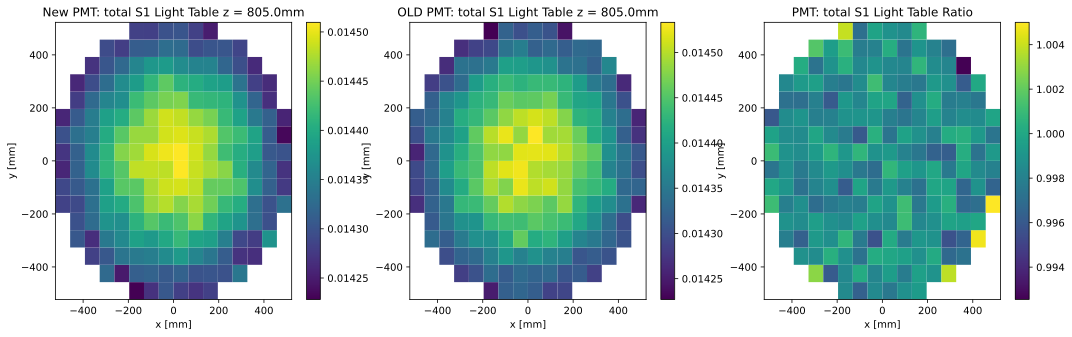

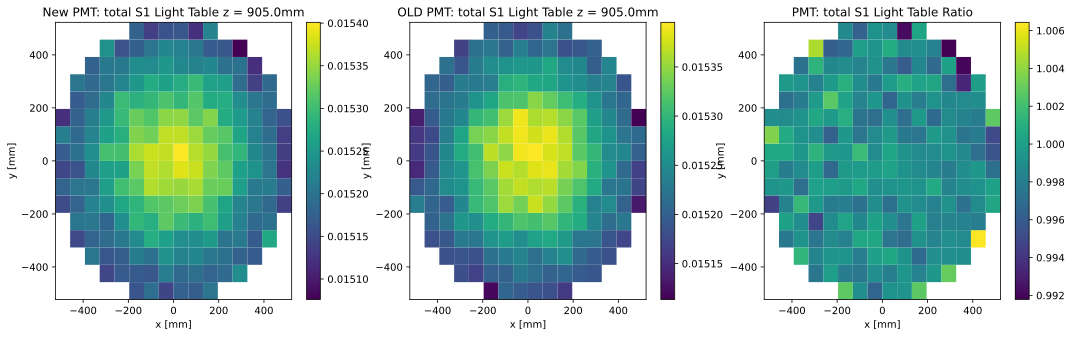

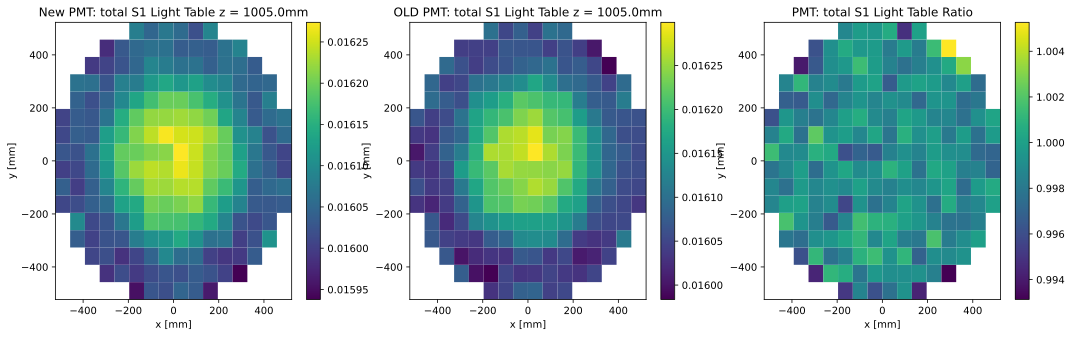

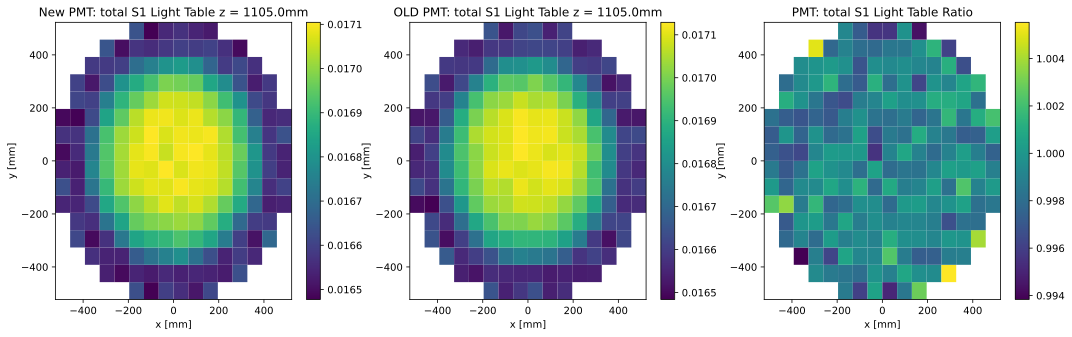

In [7]:
# Plot the slices across all z bins

sensor_id = "total"
sid =sensor_id
sensor_name = "PmtR11410_"+str(sensor_id)


n = 20

print(lt.z.unique())

df = lt

for index, z in enumerate(df.z.unique()):
    # if (index >= n): break
    if (index % 5 !=0): continue

    # print(index % 3)

    sel = lt.z == z
    sel_old = lt_old.z == z

    # Make the LT plot and error plot in one
    fig, (ax0, ax1,ax3) = plt.subplots(1, 3, figsize=[18, 5])
    # fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

    # light table
    # h, _, _ = np.histogram2d(lt[sel]["x"], lt[sel]["y"], weights=lt[sel][sensor_name], bins=[xbins, ybins])
    # im0 = ax0.imshow(np.flip(h.T, axis=0), extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]])
    counts0, xedges0, yedges0, im0 = ax0.hist2d(lt[sel]["x"], lt[sel]["y"], weights=lt[sel][sensor_name], bins=[xbins, ybins], cmin = 0.00001)
    # ax0.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
    ax0.set_title(f"New PMT: {sensor_id} S1 Light Table z = {z}mm")
    ax0.set_xlabel("x [mm]")
    ax0.set_ylabel("y [mm]")
    fig.colorbar(im0, ax=ax0)

    # OLD
    counts1, xedges1, yedges1, im1 = ax1.hist2d(lt_old[sel_old]["x"], lt_old[sel_old]["y"], weights=lt_old[sel_old][sensor_name], bins=[xbins, ybins], cmin = 0.00001)
    # ax1.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
    ax1.set_title(f"OLD PMT: {sensor_id} S1 Light Table z = {z}mm")
    ax1.set_xlabel("x [mm]")
    ax1.set_ylabel("y [mm]")
    fig.colorbar(im1, ax=ax1)

    # Plot the ratio
    pc = ax3.pcolormesh(xedges0, yedges0, (counts0/counts1).T)
    ax3.set_title(f"PMT: {sensor_id} S1 Light Table Ratio")
    ax3.set_xlabel("x [mm]")
    ax3.set_ylabel("y [mm]")
    fig.colorbar(pc)


S2 Table validation plots

In [8]:
# Load in the table
lt     = load_dst("../LT/NEXT100_MC_v07_10_01_Jan2026_S2_LT.h5", "LT", "LightTable")
err    = load_dst("../LT/NEXT100_MC_v07_10_01_Jan2026_S2_LT.h5", "LT", "Error")
config = load_dst("../LT/NEXT100_MC_v07_10_01_Jan2026_S2_LT.h5", "LT", "Config")

bv=20

# display(lt)
# print(sorted(lt.y.unique()))

# display(err)

lt_old     = load_dst(f"../LT/Old_LT_v3/NEXT100_MC_v07_10_00_Dec2025_S2_LT.h5", "LT", "LightTable")
config_old = load_dst(f"../LT/Old_LT_v3/NEXT100_MC_v07_10_00_Dec2025_S2_LT.h5", "LT", "Config")

In [9]:
display(config)

parameter      value
0     detector    next100
1   ACTIVE_rad       1000
2       EL_GAP       10.0
3   table_type     energy
4  signal_type         S2
5       sensor  PmtR11410
6      pitch_x         15
7      pitch_y         15
8        nexus   v7_10_01

In [10]:
# Set the binning
xmin=-500
xmax=500
xbw=bv

zmin=-10
zmax=0
zbw=10

xbins = np.arange(xmin, xmax+xbw, xbw)
ybins = xbins
zbins = np.arange(zmin, zmax+zbw, zbw)

xbins_centre = np.arange(xmin+xbw/2, xmax+xbw/2, xbw)
ybins_centre = xbins_centre
zbins_centre = np.arange(zmin+zbw/2, zmax+zbw/2, zbw)

(-500.0, 500.0)

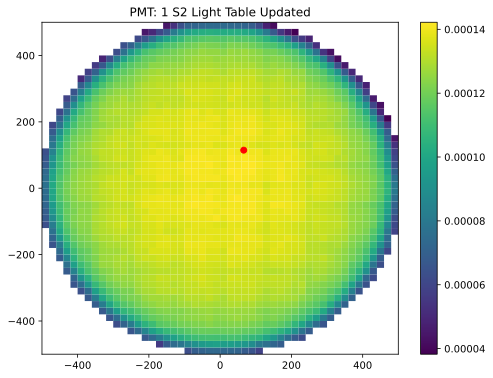

In [11]:
# Plot the slices across all z bins

sensor_id = 1
sid = sensor_id

sensor_name = "PmtR11410_"+str(sensor_id)

df = lt

fig, ax = plt.subplots(figsize=[8, 6])
counts, xedges, yedges, im = ax.hist2d(df.x, df.y, weights=df[pmt + f"_{sid}"], bins=[xbins, ybins], cmin = 0.00001)
plt.scatter(datapmt[datapmt["SensorID"]==sid].X, datapmt[datapmt["SensorID"]==sid].Y, c="r")
plt.colorbar(im, ax=ax)
# plt.savefig(f"S2_LT_{bv}mm_bins_s.pdf")
ax.set_title(f"PMT: {sensor_id} S2 Light Table Updated")
plt.xlim(-500,500)
plt.ylim(-500,500)

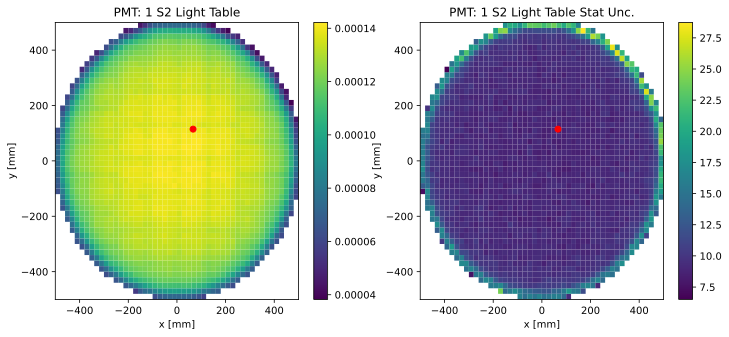

In [12]:
sensor_id = 1
sensor_name = "PmtR11410_"+str(sensor_id)


# Make the LT plot and error plot in one
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[12, 5])
# fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

# light table
# h, _, _ = np.histogram2d(lt["x"], lt["y"], weights=lt[sensor_name], bins=[xbins, ybins])
# im0 = ax0.imshow(np.flip(h.T, axis=0), extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]])
counts0, xedges0, yedges0, im0 = ax0.hist2d(lt["x"], lt["y"], weights=lt[sensor_name], bins=[xbins, ybins], cmin = 0.00001)

ax0.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
ax0.set_title(f"PMT: {sensor_id} S2 Light Table")
ax0.set_xlabel("x [mm]")
ax0.set_ylabel("y [mm]")
fig.colorbar(im0, ax=ax0)

# err
# h, _, _ = np.histogram2d(err["x"], err["y"], weights=err[sensor_name], bins=[xbins, ybins])
# im1 = ax1.imshow(np.flip(h.T, axis=0), extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]], cmap='inferno', vmax=25, vmin=0)

counts1, xedges1, yedges1, im1 = ax1.hist2d(err["x"], err["y"], weights=err[sensor_name], bins=[xbins, ybins], cmin = 0.00001)
ax1.set_title(f"PMT: {sensor_id} S2 Light Table Stat Unc.")
ax1.set_xlabel("x [mm]")
ax1.set_ylabel("y [mm]")
ax1.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
fig.colorbar(im1, ax=ax1)

plt.savefig(f"S2_LT_{bv}mm_bins.pdf")


(-500.0, 500.0)

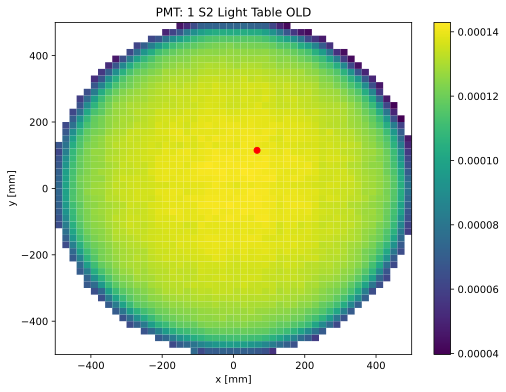

In [13]:
sensor_id = 1
sensor_name = "PmtR11410_"+str(sensor_id)


# Make the LT plot and error plot in one
fig, ax3 = plt.subplots(1, 1, figsize=[8, 6])

# light table
counts3, xedges3, yedges3, im3 = ax3.hist2d(lt_old["x"], lt_old["y"], weights=lt_old[sensor_name], bins=[xbins, ybins], cmin = 0.00001)

ax3.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
ax3.set_title(f"PMT: {sensor_id} S2 Light Table OLD")
ax3.set_xlabel("x [mm]")
ax3.set_ylabel("y [mm]")
fig.colorbar(im3, ax=ax3)
plt.xlim(-500,500)
plt.ylim(-500,500)

# plt.savefig(f"S2_LT_{bv}mm_bins_mesh.pdf")


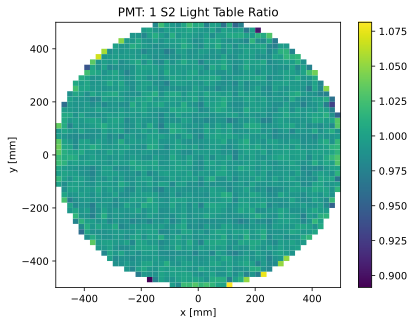

In [18]:
# Plot the ratio
fig = plt.figure()
ax=fig.add_subplot(111)
pc = plt.pcolormesh(xedges, yedges, (counts0/counts3).T)
plt.title(f"PMT: {sensor_id} S2 Light Table Ratio")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
fig.colorbar(pc)

[0. 0. 0. ... 0. 0. 0.]


Text(0, 0.5, 'Counts')

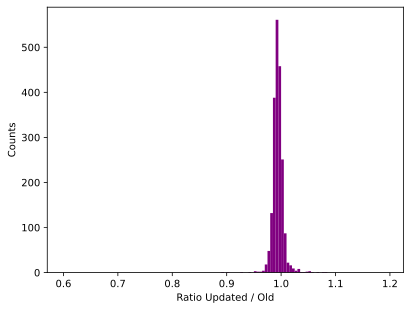

In [19]:
# Make a 1D histogram of the ratio
data = (counts0/counts3).flatten()
data = np.nan_to_num(data)
print(data)

plt.hist(data, bins = np.arange(0.6, 1.2, 0.005), color = "purple")
plt.xlabel("Ratio Updated / Old")
plt.ylabel("Counts")

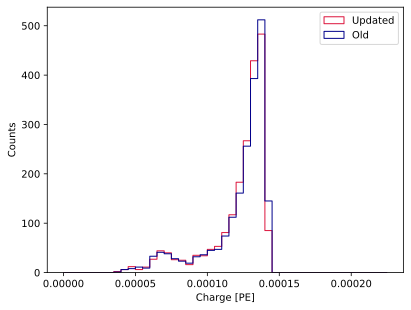

In [16]:
plt.hist(counts0.flatten(), bins = np.arange(0,2.3e-4, 5e-6), histtype="step", color = "crimson", label = "Updated");
plt.hist(counts3.flatten(), bins = np.arange(0,2.3e-4, 5e-6), histtype="step", color = "darkblue", label = "Old");
plt.xlabel("Charge [PE]")
plt.ylabel("Counts")
plt.legend()

In [17]:
# Lets load in the PSF functions for the new LT with square/disk sampling and also the old one
psf_disk    = load_dst(f"../LT/NEXT100_PSF_Disk.h5", "PSF", "LightTable")
psf_square  = load_dst(f"../LT/NEXT100_PSF_square.h5", "PSF", "LightTable")
psf_old     = load_dst(f"../LT/Old_LT/NEXT100_PSF.h5", "PSF", "LightTable")

OSError: ``/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/LightTableGen/LT/NEXT100_PSF_Disk.h5`` does not exist

In [ ]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=[18,6])
for i in range(1, 11,2):
    
    ax1.scatter(psf_disk.index, psf_disk[f"z_m{i+1}"], s=10, label="z = {0} mm".format(i), linestyle="-")
    ax1.set_yscale("log")
    ax1.set_ylim(2.5e-8, 2e-4)
    ax1.set_xlabel("Distance [mm]")
    ax1.set_ylabel("PSF [pes/photons]")
    ax1.set_title("Updated PSF Disk")
    ax1.legend()

    ax2.scatter(psf_square.index, psf_square[f"z_m{i+1}"], s=10, label="z = {0} mm".format(i), linestyle="-")
    ax2.set_yscale("log")
    ax2.set_ylim(2.5e-8, 2e-4)
    ax2.set_xlabel("Distance [mm]")
    ax2.set_ylabel("PSF [pes/photons]")
    ax2.set_title("Updated PSF Square")

    ax3.scatter(psf_old.index, psf_old[f"z_m{i+1}"], s=10, label="z = {0} mm".format(i), linestyle="-")
    ax3.set_yscale("log")
    ax3.set_ylim(2.5e-8, 2e-4)
    ax3.set_xlabel("Distance [mm]")
    ax3.set_ylabel("PSF [pes/photons]")
    ax3.set_title("Old PSF")


In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(12, 30))

counter = 1

# Iterate over each subplot and plot a figure
for i in range(5):
    for j in range(2):
        # Plot a figure in the current subplot
        axes[i, j].scatter(psf_disk.index, psf_disk[f"z_m{counter}"]/psf_square[f"z_m{counter}"], s=10, label="z = {0} mm".format(i), linestyle="-", color = "darkblue")
        axes[i, j].set_title(f'Subplot ({i+1}, {j+1})')

        axes[i, j].set_xlabel("Distance [mm]")
        axes[i, j].set_ylabel("Ratio]")
        axes[i, j].set_title(f"Ratio PSF Disk/Square, z={counter}mm")

        counter+=1

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(12, 30))

counter = 1

# Iterate over each subplot and plot a figure
for i in range(5):
    for j in range(2):
        # Plot a figure in the current subplot
        axes[i, j].scatter(psf_disk.index, psf_disk[f"z_m{counter}"]/psf_old[f"z_m{counter}"], s=10, label="z = {0} mm".format(i), linestyle="-", color = "crimson")
        axes[i, j].set_title(f'Subplot ({i+1}, {j+1})')

        axes[i, j].set_xlabel("Distance [mm]")
        axes[i, j].set_ylabel("Ratio]")
        axes[i, j].set_title(f"Ratio PSF Square/Old, z={counter}mm")

        counter+=1

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()